In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training set shape:", x_train.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28, 1)


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - accuracy: 0.8918 - loss: 0.3416 - val_accuracy: 0.9850 - val_loss: 0.0529
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9837 - loss: 0.0518 - val_accuracy: 0.9870 - val_loss: 0.0527
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9884 - loss: 0.0371 - val_accuracy: 0.9895 - val_loss: 0.0379
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9882 - val_loss: 0.0387
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9942 - loss: 0.0177 - val_accuracy: 0.9917 - val_loss: 0.0343


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9871 - loss: 0.0407
Test Accuracy: 0.9905


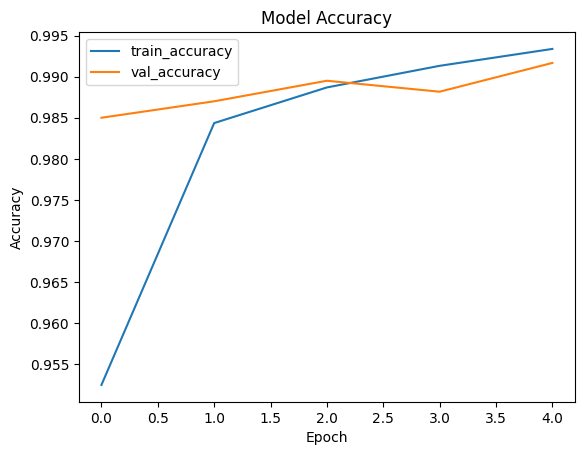

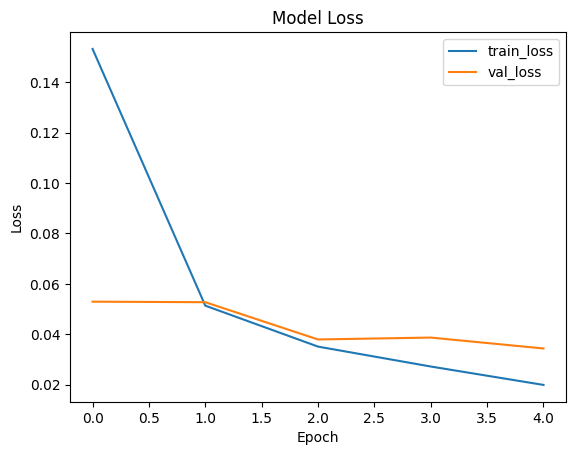

In [6]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


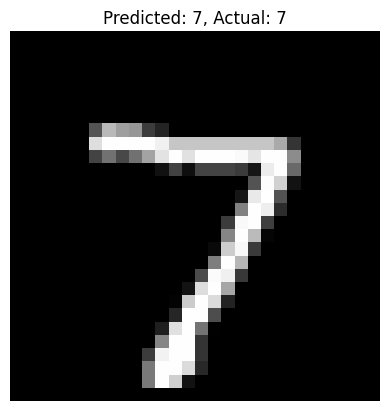

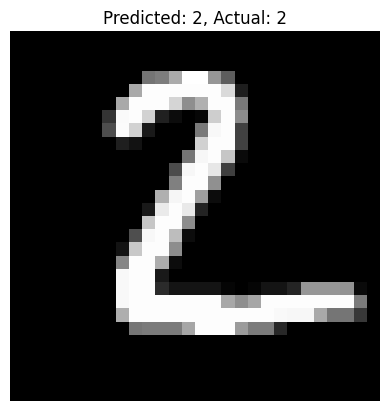

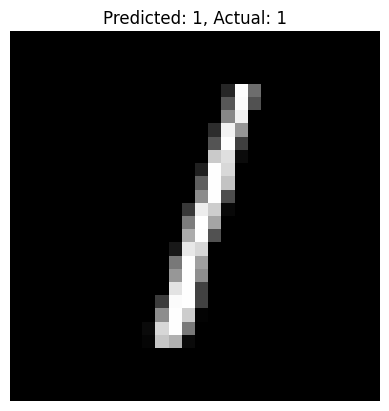

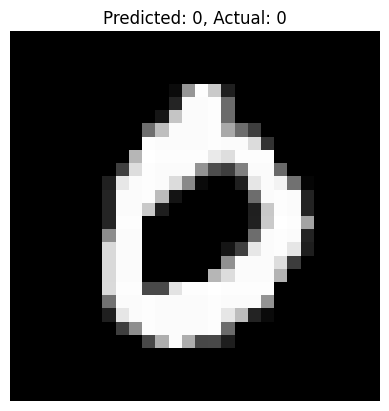

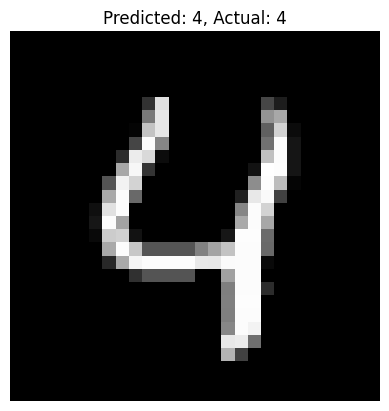

In [7]:
# Predict and display few images with prediction
predictions = model.predict(x_test)
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()


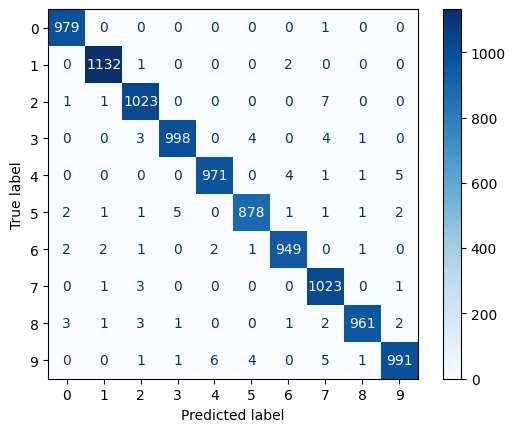

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
